In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('data/df.csv')
train=pd.read_csv('data/train.csv')

In [3]:
df['handling_time'].head()

0     7
1     9
2     6
3    18
4    11
Name: handling_time, dtype: int64

In [4]:
train.head()

,user_id,label,success,card_num,hyperlink_clicks,magnify_clicks,expert_clicks,handling_time,hyperlink_clicked,magnify_clicked,expert_clicked,log_handling_time,time_lt_20,time_gt_100
0,150301,0,0,12,0,0,0,14,0,0,0,2.639057,1,0
1,150301,0,0,5,1,0,0,40,1,0,0,3.688879,0,0
2,150301,0,0,9,0,0,0,16,0,0,0,2.772589,1,0
3,150301,0,0,15,1,0,0,79,1,0,0,4.369448,0,0
4,175964,1,60,15,0,0,0,179,0,0,0,5.187386,0,1


In [5]:
avg_time=df.groupby(['card_num'])['handling_time'].mean()

In [6]:
avg_success = train.groupby('user_id')['success'].mean()
avg_success = pd.DataFrame(avg_success)
avg_success['top_half']=0
median_score = avg_success['success'].median()
avg_success.loc[avg_success.success>=median_score,'top_half']=1
avg_success['user_id']=avg_success.index
avg_success.head()

,success,top_half,user_id
user_id,,,
150301,0.000000,0,150301
175964,56.166667,1,175964
203883,44.000000,0,203883
210022,45.833333,0,210022
212749,46.666667,0,212749


In [7]:
pd.value_counts(avg_success.top_half)

1    1155
0    1128
dtype: int64

In [8]:
avg_success['success'].median()

52.833333333333336

In [9]:
df2 = pd.merge(df,avg_success,on=['user_id'])
df2 = df2[['user_id','card_num','top_half','handling_time']]

In [10]:
time_by_card = df2.groupby(['card_num','top_half'])['handling_time'].mean()

In [11]:
time_by_card

card_num  top_half
1         0            76.364685
          1            74.987013
2         0            33.023070
          1            33.645581
3         0           159.047028
          1           193.223377
4         0            98.072695
          1           129.340260
5         0           228.203901
          1           294.935065
6         0           115.991979
          1           134.454467
7         0           130.458036
          1           163.940104
8         0            87.700000
          1           112.898438
9         0           150.540250
          1           183.404514
10        0            95.176259
          1           110.205729
11        0           132.386282
          1           168.845352
12        0           101.854941
          1           101.837533
13        0           121.510000
          1           150.933043
14        0           109.745902
          1           140.150435
15        0           149.039234
          1           18

In [12]:
df3 = pd.DataFrame(time_by_card.loc[:,0])
df3['top_time']=time_by_card.loc[:,1]
df3.columns=['bottom_time','top_time']
df3

,bottom_time,top_time
card_num,,
1,76.364685,74.987013
2,33.023070,33.645581
3,159.047028,193.223377
4,98.072695,129.340260
5,228.203901,294.935065
6,115.991979,134.454467
7,130.458036,163.940104
8,87.700000,112.898438
9,150.540250,183.404514


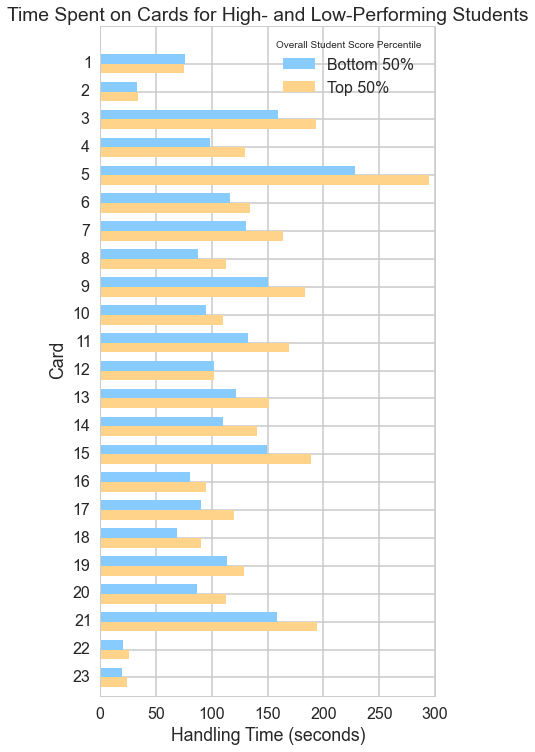

In [13]:
sns.set_style("whitegrid")
sns.set_context("poster")
width = 0.35
fig, ax = plt.subplots(figsize=(6,12))
rects1 = ax.barh(df3.index,df3['bottom_time'],width,color='#88CCFF',edgecolor='none')
rects2 = ax.barh(df3.index+width,df3['top_time'],width,color='#FFD38A',edgecolor='none')
ax.set_xlabel('Handling Time (seconds)')
ax.set_ylabel('Card')
ax.set_title('Time Spent on Cards for High- and Low-Performing Students')
ax.set_yticks([c + width for c in df3.index])
ax.set_yticklabels(df3.index, va='center')

ax.legend((rects1[0], rects2[0]), ('Bottom 50%', 'Top 50%'), title="Overall Student Score Percentile")
ax.set_ylim([0,24])
plt.gca().invert_yaxis()

def autolabel(rects):
    # attach label if null
    for rect in rects:
        width = rect.get_width()
        if pd.isnull(width):
            ax.text(0,rect.get_y() + rect.get_height()/2.,
                'X',
                ha='left', va='center')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

In [113]:
times=[]

In [116]:
times.append(train.loc[train.handling_time<20,].shape[0]*1./train.shape[0])

In [117]:
times.append(train.loc[(train.handling_time>=20) & (train.handling_time<=100),].shape[0]*1./train.shape[0])

In [118]:
times.append(train.loc[train.handling_time>100,].shape[0]*1./train.shape[0])

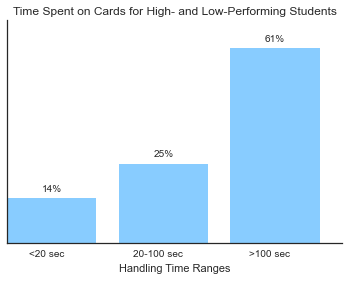

In [152]:
width=.35
fig, ax = plt.subplots()
sns.set_style("white")
sns.despine()
rects = ax.bar(range(3),times,color='#88CCFF',edgecolor='none')
ax.set_xlabel('Handling Time Ranges')
ax.set_title('Time Spent on Cards for High- and Low-Performing Students')
ax.set_xticks([c + width for c in range(3)])
ax.set_xticklabels(['<20 sec','20-100 sec','>100 sec'], ha='center')
ax.set_yticks([])

def autolabel(rects):
    # attach label if null
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,
                h + .03,
            '{:.0%}'.format(h),
            ha='center', va='center')

autolabel(rects)

In [121]:
times

[0.14062615646510251, 0.2483161868107468, 0.6110576567241507]